In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Data/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data = df.copy()

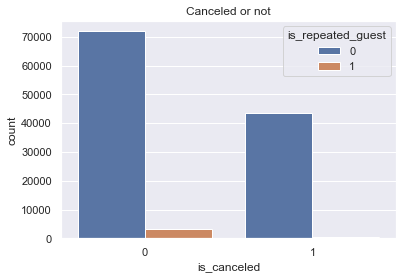

In [7]:
sns.set(style = 'darkgrid')
plt.title('Canceled or not')
ax = sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)

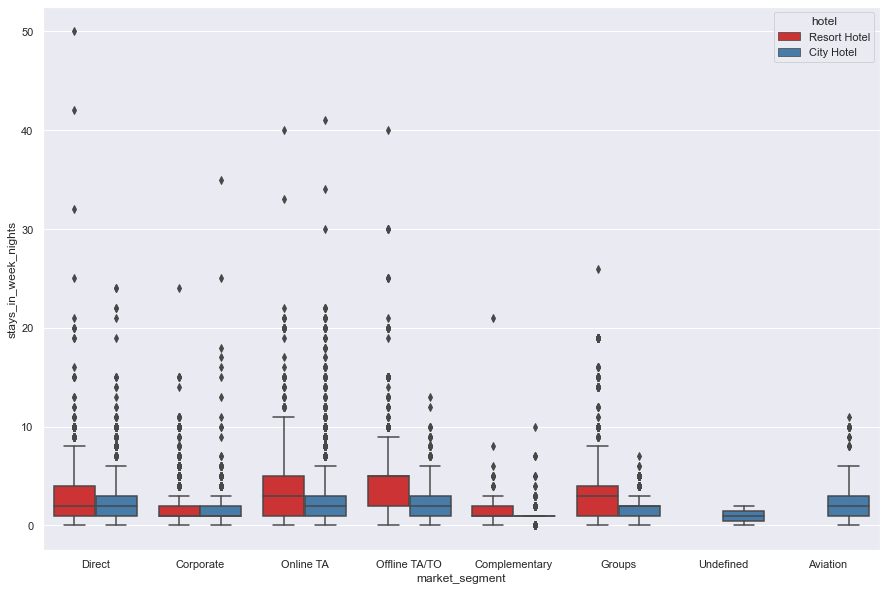

In [8]:
plt.figure(figsize = (15,10))
sns.boxplot(x='market_segment', y='stays_in_week_nights', data=data, hue="hotel", palette='Set1')
plt.show()

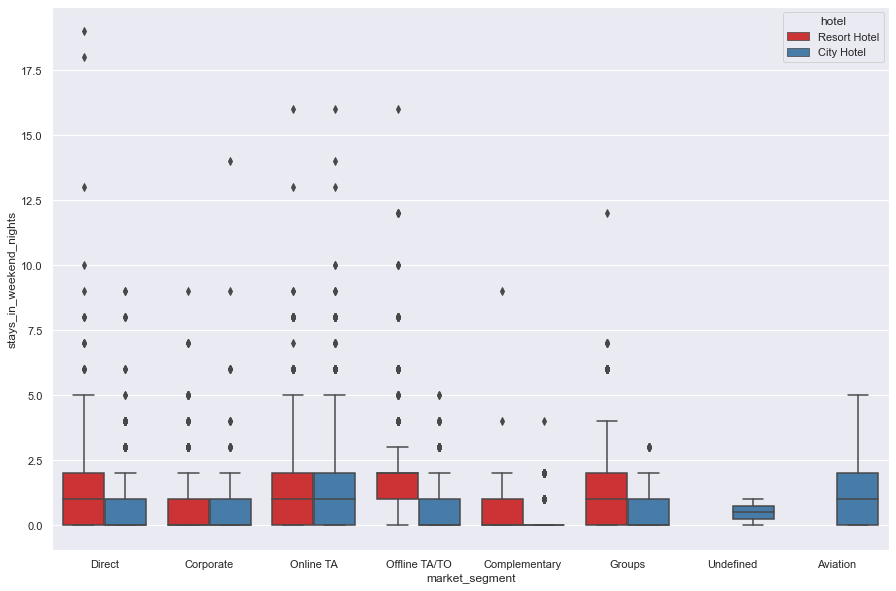

In [9]:
plt.figure(figsize = (15,10))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=data, hue="hotel", palette='Set1')
plt.show()

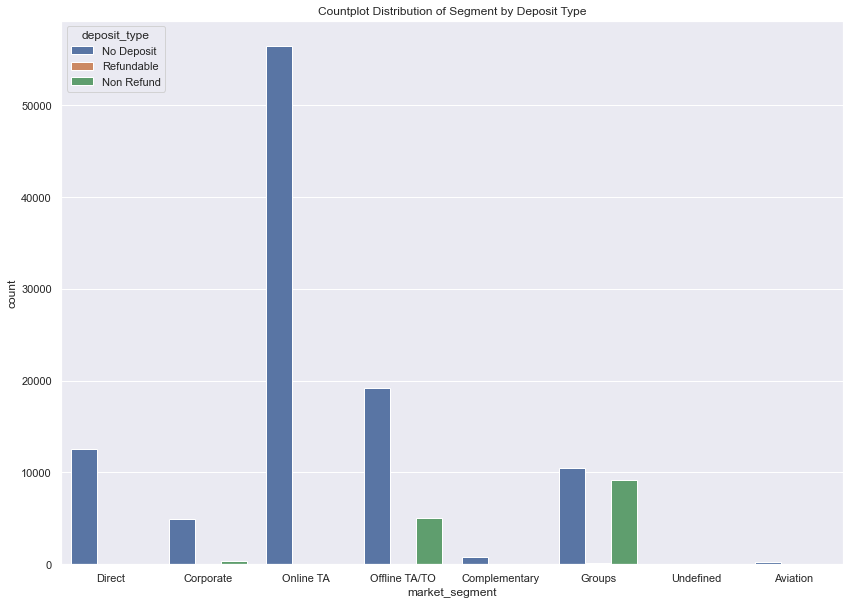

In [10]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Countplot Distribution of Segment by Deposit Type')
ax = sns.countplot(x='market_segment', hue='deposit_type', data=data)


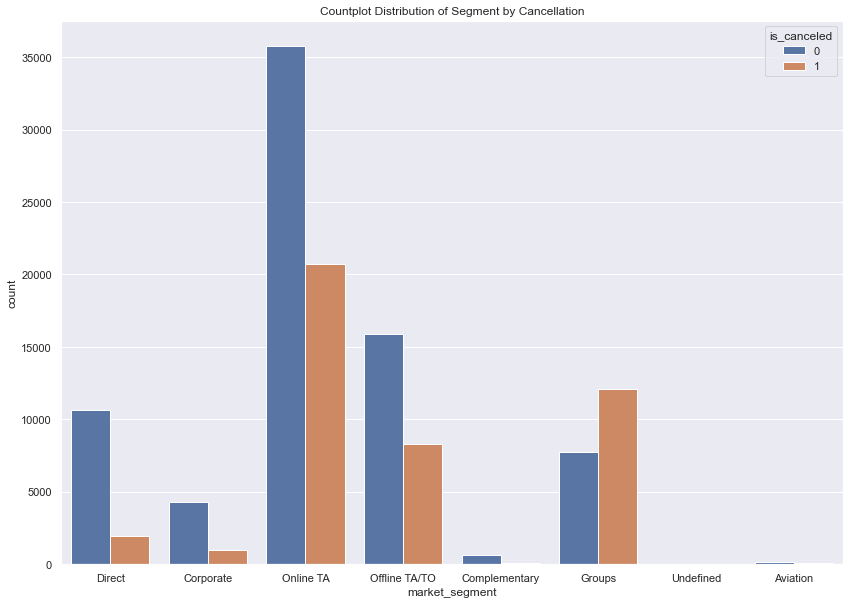

In [11]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Countplot Distribution of Segment by Cancellation')
ax = sns.countplot(x='market_segment', hue='is_canceled', data=data)

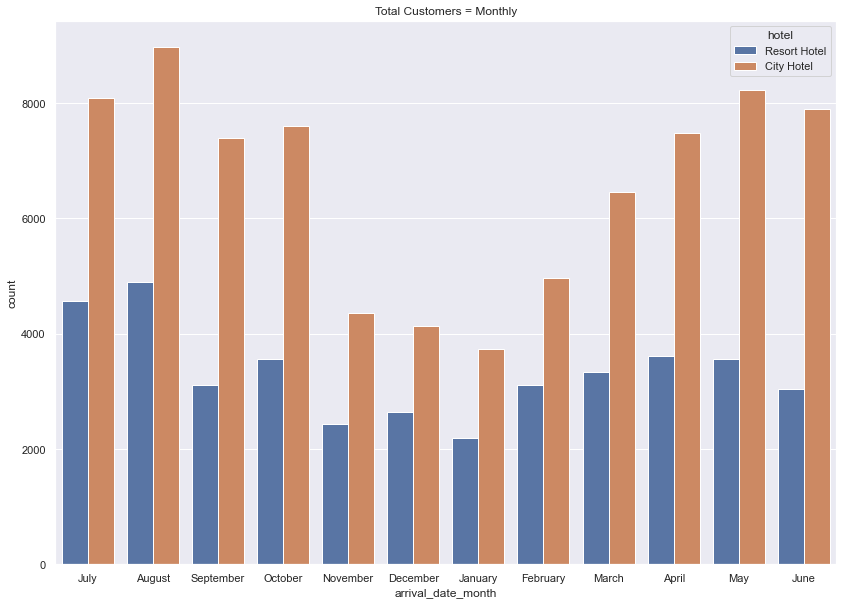

In [12]:
plt.figure(figsize=(14,10))
sns.set(style='darkgrid')
plt.title('Total Customers = Monthly')
ax = sns.countplot(x='arrival_date_month', hue='hotel', data=data)

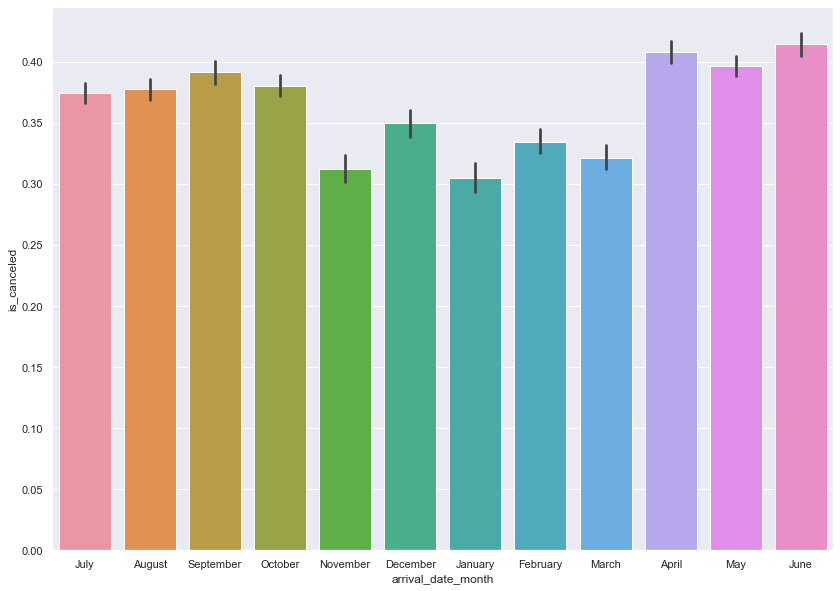

In [13]:
plt.figure(figsize=(14,10))
sns.barplot(x='arrival_date_month', y='is_canceled', data=data)
plt.show()

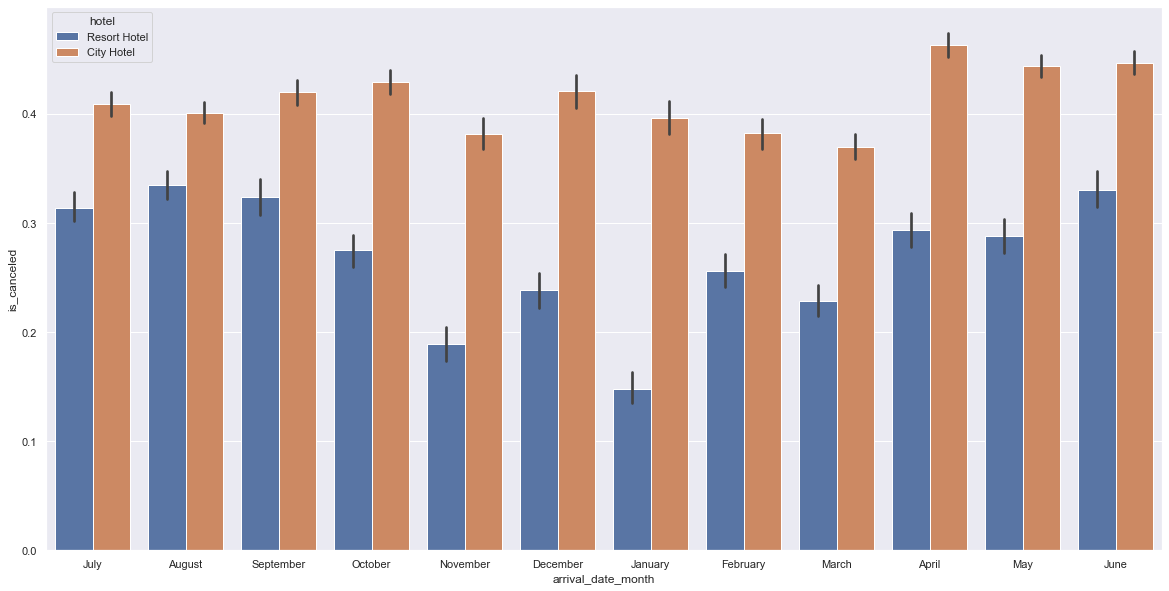

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x='arrival_date_month', y='is_canceled', hue='hotel', data=data)
plt.show()

In [15]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

In [16]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                                   perc_mv(df, df['agent']),
                                                                                   perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


In [17]:
data["agent"].value_counts().count()

333

In [18]:
data = data.drop(['company'], axis = 1)

In [19]:
data['children'] = data['children'].fillna(0)

In [20]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [21]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [22]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [23]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)

In [24]:
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [25]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [26]:
cor_data = data.copy()

In [27]:
le = LabelEncoder()

In [28]:
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

In [29]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


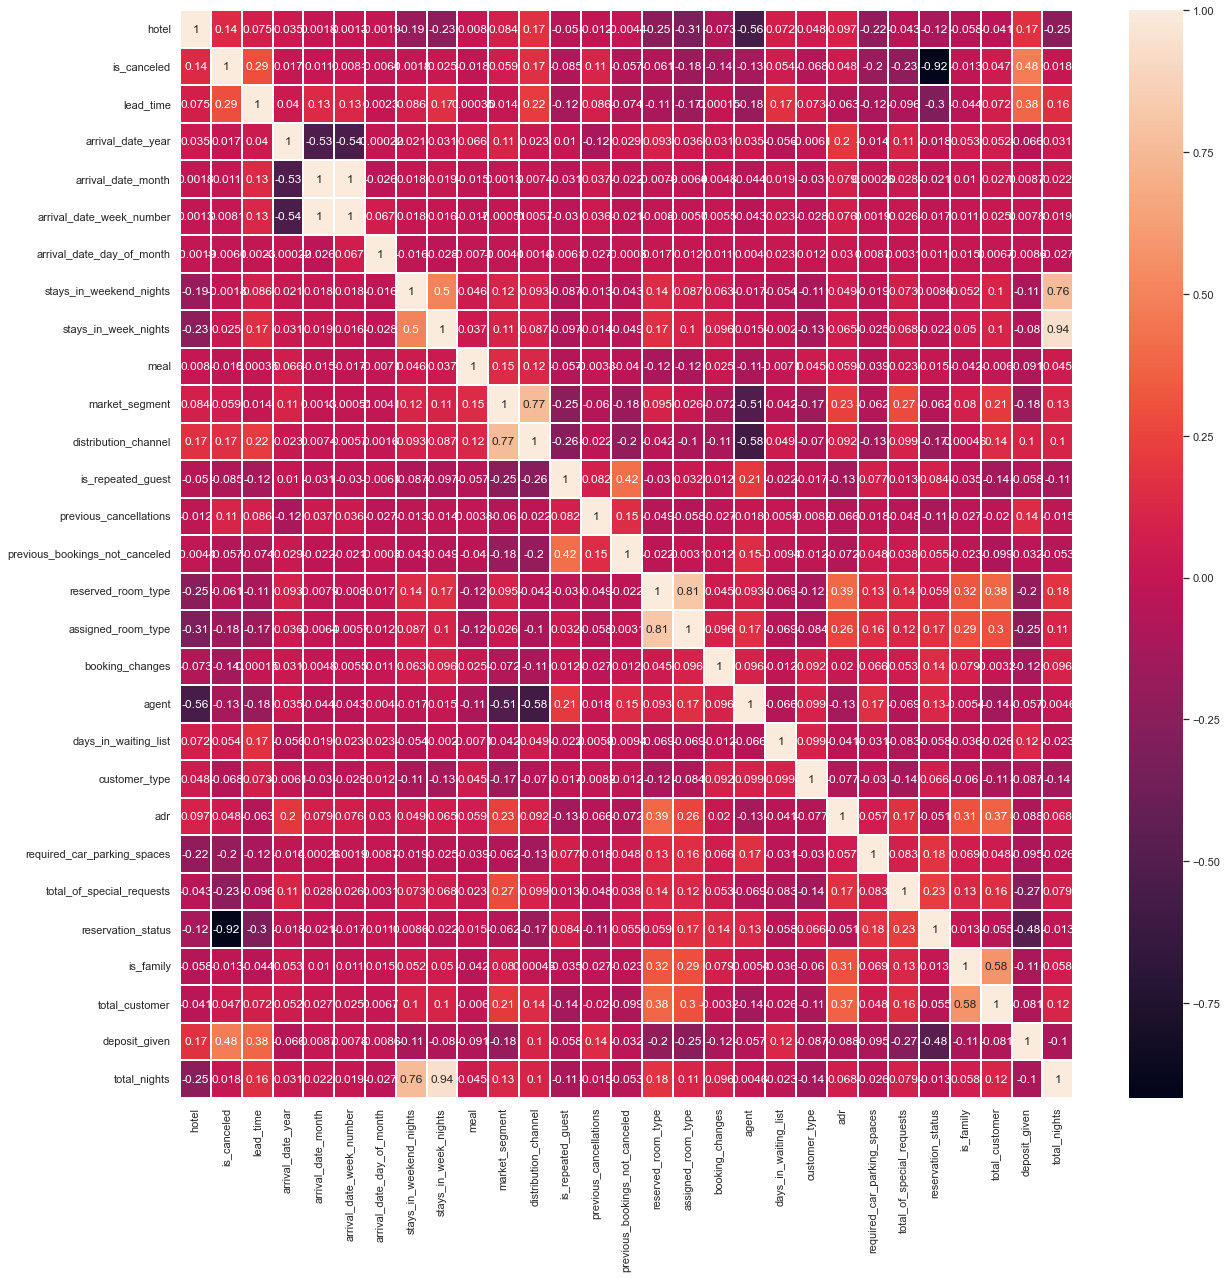

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_data.corr(), linewidths=0.1, annot=True)
plt.show()

In [31]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.130010
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

In [32]:
cor_data.corr()['stays_in_week_nights']

hotel                            -0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month                0.019212
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
meal                              0.036742
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                             0.014903
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065237
required_car_parking_spaces      -0.024859
total_of_sp

In [33]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [34]:
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

In [35]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [36]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

In [37]:
df1 = data.copy()

In [38]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [39]:
df1['country'] = le.fit_transform(df1['country']) 

In [40]:
y= df1['is_canceled']
X = df1.drop(['is_canceled'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
cart = DecisionTreeClassifier(max_depth = 12)
cart_model = cart.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


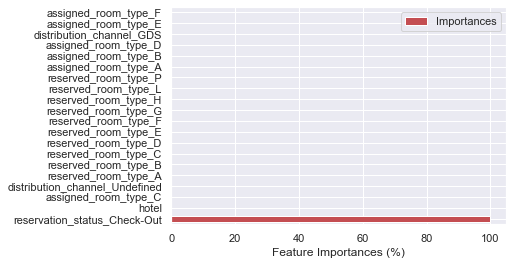

In [42]:
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")
plt.xlabel("Feature Importances (%)")
plt.show()

In [43]:
df2 = df1.drop(columns=['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis=1)

In [44]:
y = df2['is_canceled']
X = df2.drop(['is_canceled'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [46]:
print('Model: Logistic Regression\n')
model(LogisticRegression(solver = "liblinear"), X_train, X_test, y_train, y_test)

Model: Logistic Regression

Accuracy Score: 0.8043228392812088

Confusion Matrix:
 [[20485  1868]
 [ 5112  8206]]


In [47]:
LogR = LogisticRegression(solver = "liblinear")
cv_scores = cross_val_score(LogR, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.7708618724864235


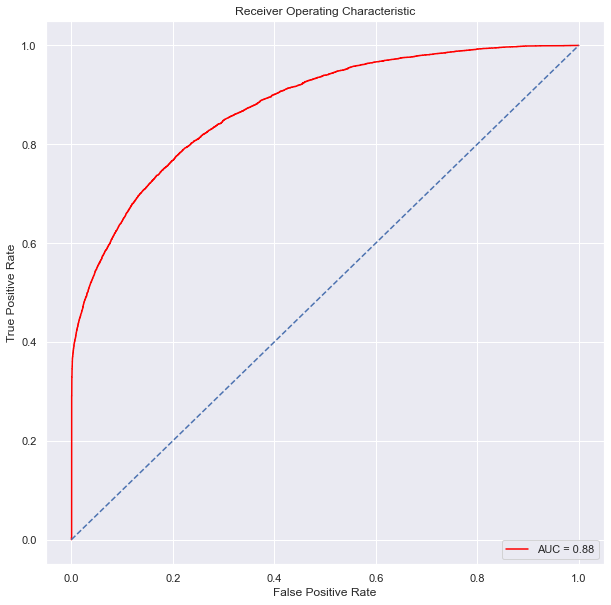

In [48]:
ROC(y_test, y_prob)

In [49]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]


In [50]:
print('Model: Gaussian Naive Bayes\n')
model(GaussianNB(), X_train, X_test, y_train, y_test)

Model: Gaussian Naive Bayes

Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9604 12749]
 [ 2010 11308]]


In [51]:
NB = GaussianNB()
cv_scores = cross_val_score(NB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.5624280984012298


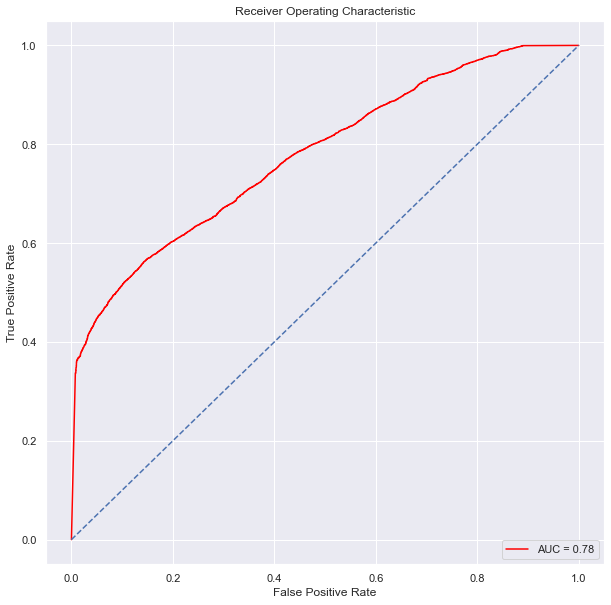

In [52]:
ROC(y_test, y_prob)

In [53]:
print('Model: SVC\n')

def model1(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    
model1(SVC(kernel = 'linear'), X_train, X_test, y_train, y_test)

Model: SVC

Accuracy Score: 0.7942586414734658

Confusion Matrix:
 [[20864  1489]
 [ 5850  7468]]


In [54]:
print('Model: Decision Tree\n')
model(DecisionTreeClassifier(max_depth = 12), X_train, X_test, y_train, y_test)

Model: Decision Tree

Accuracy Score: 0.8463457710745423

Confusion Matrix:
 [[20374  1979]
 [ 3502  9816]]


In [55]:
DTC = DecisionTreeClassifier(max_depth = 12)
cv_scores = cross_val_score(DTC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6739157326504064


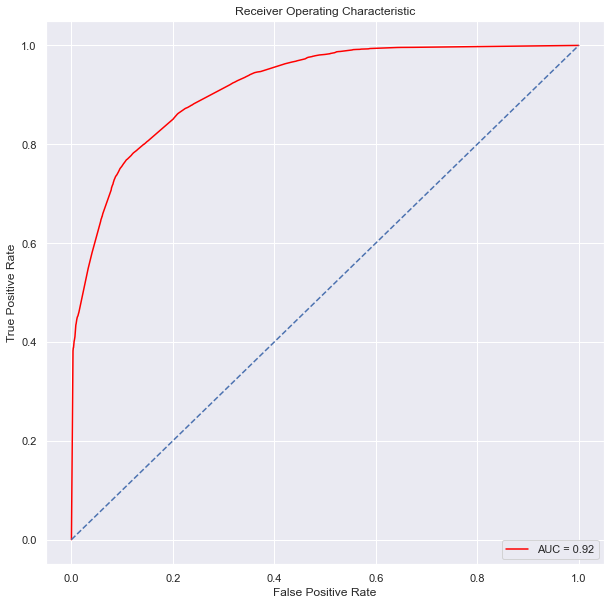

In [56]:
ROC(y_test, y_prob)

In [57]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8846682178800707

Confusion Matrix:
 [[20966  1387]
 [ 2727 10591]]


In [58]:
RFC = RandomForestClassifier()
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.6748576299565276


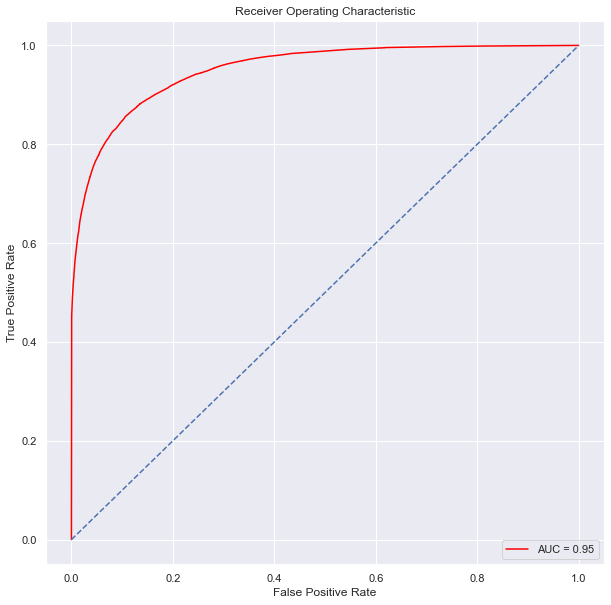

In [59]:
ROC(y_test, y_prob)

In [60]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [61]:
rf_model = RandomForestClassifier()

In [62]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

In [63]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 13], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [64]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 500}


In [65]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.8515600908300861

Confusion Matrix:
 [[21088  1265]
 [ 4030  9288]]


In [66]:
print('Model: XGBoost\n')
model(XGBClassifier(verbosity = 0), X_train, X_test, y_train, y_test)

Model: XGBoost

Accuracy Score: 0.8696980740657677

Confusion Matrix:
 [[20570  1783]
 [ 2865 10453]]


In [67]:
XGB = XGBClassifier(verbosity = 0)
cv_scores = cross_val_score(XGB, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.651031688035794


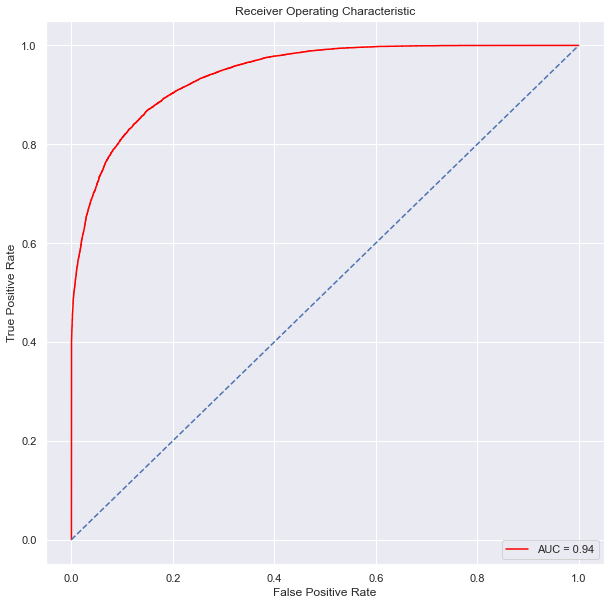

In [68]:
ROC(y_test, y_prob)

In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
print('Model: Neural Network\n')
model(MLPClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)

Model: Neural Network

Accuracy Score: 0.8528496537803818

Confusion Matrix:
 [[20659  1694]
 [ 3555  9763]]


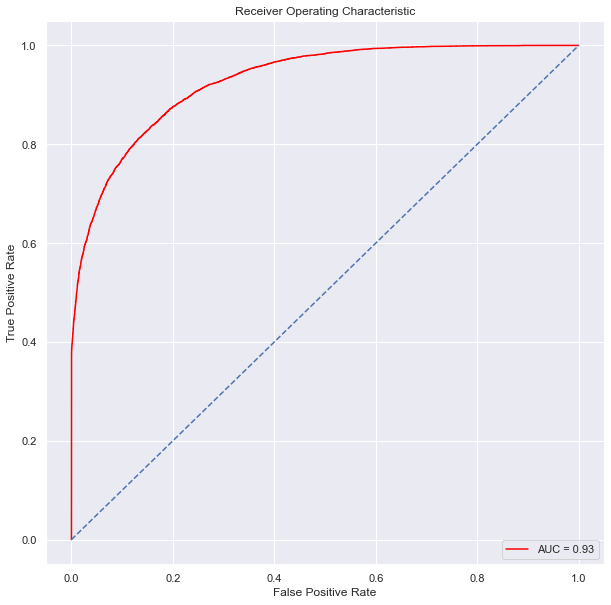

In [71]:
ROC(y_test, y_prob)

In [72]:
mlpc_parameters = {"alpha": [1, 0.1, 0.01, 0.001],
                   "hidden_layer_sizes": [(50,50,50),
                                          (100,100)],
                   "solver": ["adam", "sgd"],
                   "activation": ["logistic", "relu"]}

In [73]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_parameters,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [1, 0.1, 0.01, 0.001],
                         'hidden_layer_sizes': [(50, 50, 50), (100, 100)],
                         'solver': ['adam', 'sgd']},
             verbose=2)

In [74]:
print('Best parameters: ' + str(mlpc_cv_model.best_params_))

Best parameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [75]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')

In [76]:
print('Model: Neural Network Tuned\n')
model(mlpc_tuned, X_train_scaled, X_test_scaled, y_train, y_test)

Model: Neural Network Tuned

Accuracy Score: 0.8559894592245801

Confusion Matrix:
 [[20068  2285]
 [ 2852 10466]]


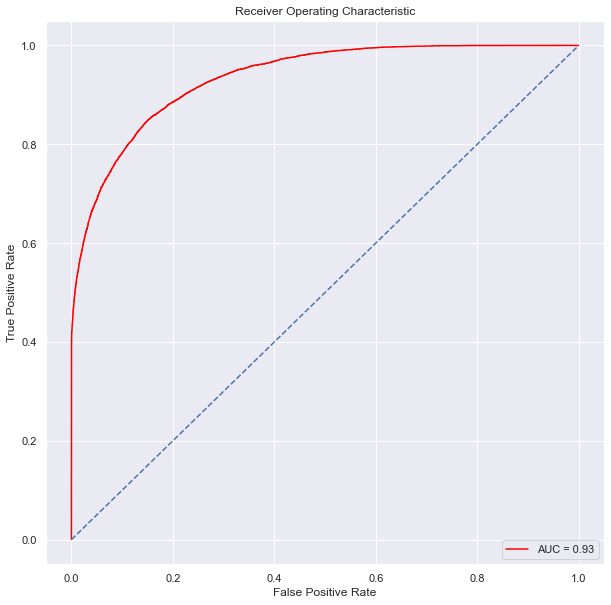

In [77]:
ROC(y_test, y_prob)

Text(0.5, 0, 'Feature Importances (%)')

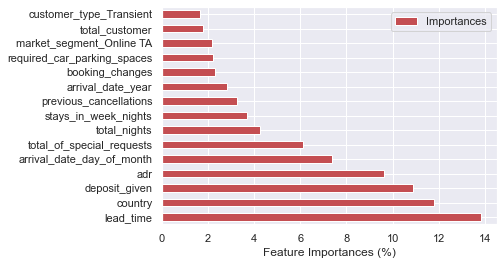

In [78]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")